In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Sanath\Desktop\Diwali Sales Data.csv",encoding = 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [2]:
df.shape

(11251, 15)

In [3]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
#1dropping unwanted data
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [6]:
#checking null
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
#drop null values in amount col
df.dropna(inplace=True)

In [8]:
#12 rows having null value are dropped i.e 11251->11239
df.shape

(11239, 13)

In [9]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# EDA(Exploratory Data Analysis)

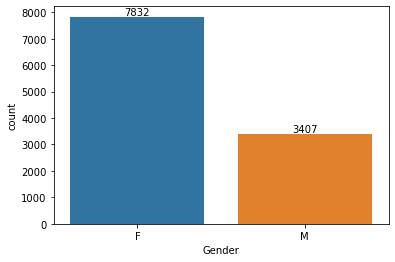

In [11]:
#No.of Males and Females
a=sns.countplot(x='Gender',data=df)
for bars in a.containers:
    a.bar_label(bars)

In [12]:
#Amount generated by female/male
df.groupby(['Gender'],as_index=False)['Amount'].sum()

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

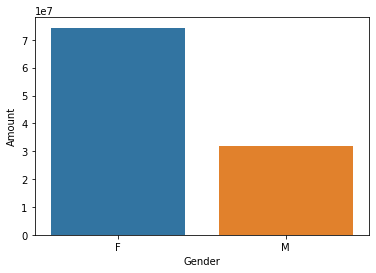

In [13]:
#Amount generated by female/male
a1=df.groupby(['Gender'],as_index=False)['Amount'].sum()
sns.barplot(x='Gender',y='Amount',data=a1)

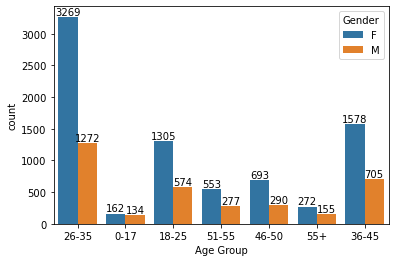

In [14]:
#agegroup
a3=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in a3.containers:
    a3.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

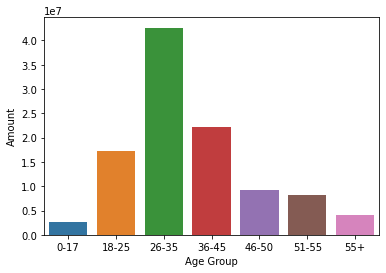

In [15]:
#Total amount spend by age group
a4=df.groupby(['Age Group'],as_index=False)['Amount'].sum()
sns.barplot(x='Age Group',y='Amount',data=a4)

# From above graph we can see that most of the buyers are females of age group of 26-35 

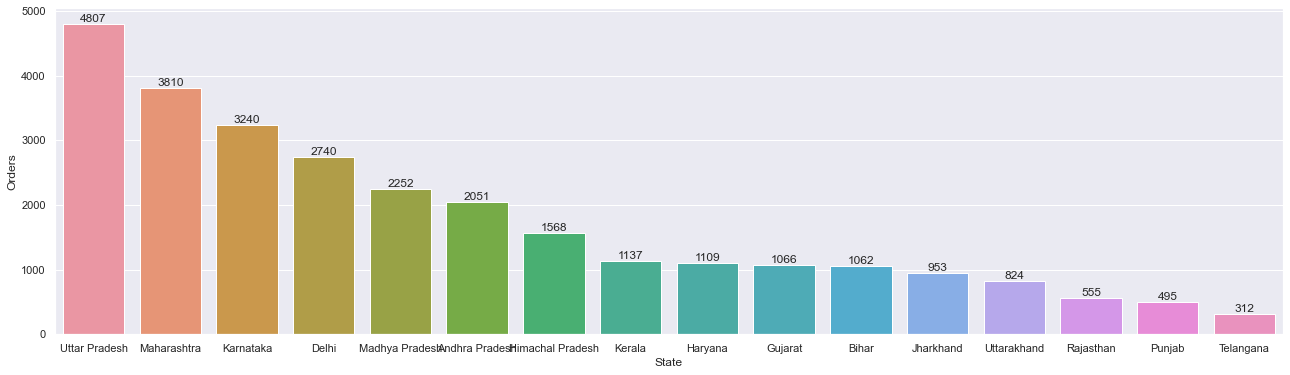

In [16]:
#State VS Orders
a5=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(22,6)})
a6=sns.barplot(x='State',y='Orders',data=a5)
for bars in a6.containers:
    a6.bar_label(bars)

# From the above graph we can see that UP has the highest order count

<AxesSubplot:xlabel='State', ylabel='Amount'>

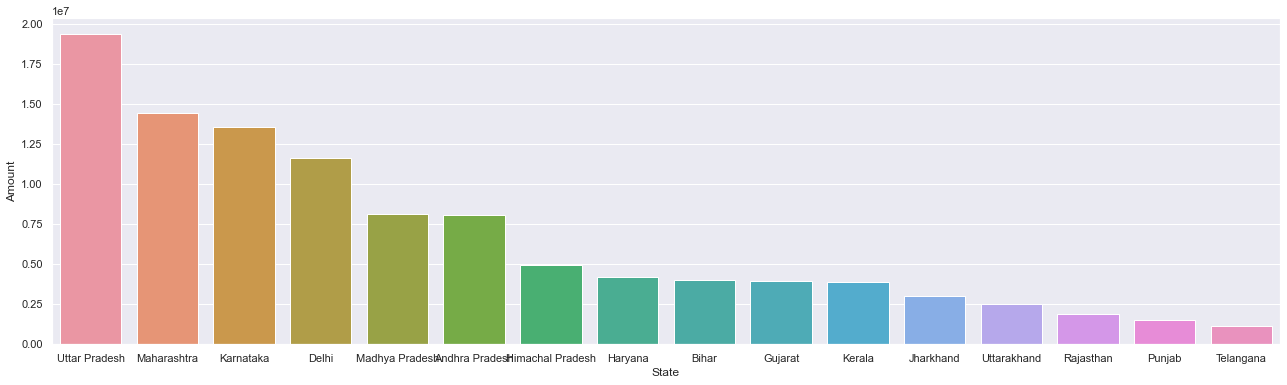

In [17]:
#Total amount spend by State
a4=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='State',y='Amount',data=a4)

# Here we can see that Haryana has the purchasing power more than Kerala which has more order count than Haryana 

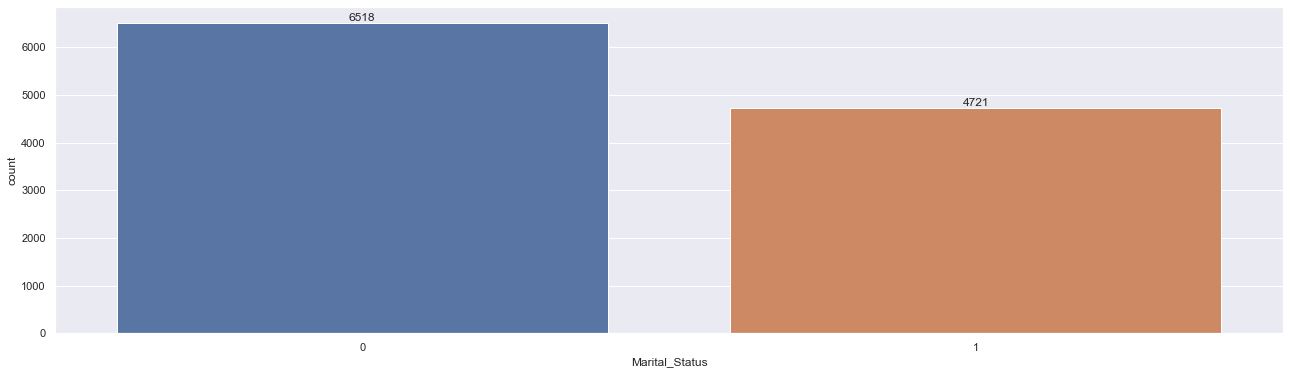

In [18]:
#Martial Status i.e unmarried and married
a7=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(5,5)})
for bars in a7.containers:
    a7.bar_label(bars)

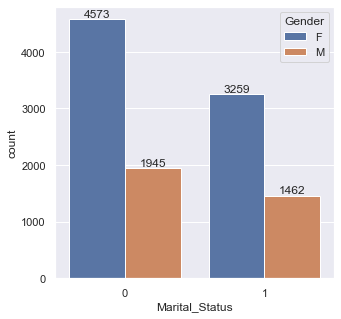

In [19]:
a3=sns.countplot(data=df,x='Marital_Status',hue='Gender')
for bars in a3.containers:
    a3.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

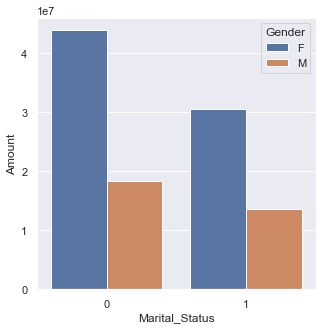

In [20]:
a8=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum()
sns.barplot(x='Marital_Status',y='Amount',data=a8,hue='Gender')

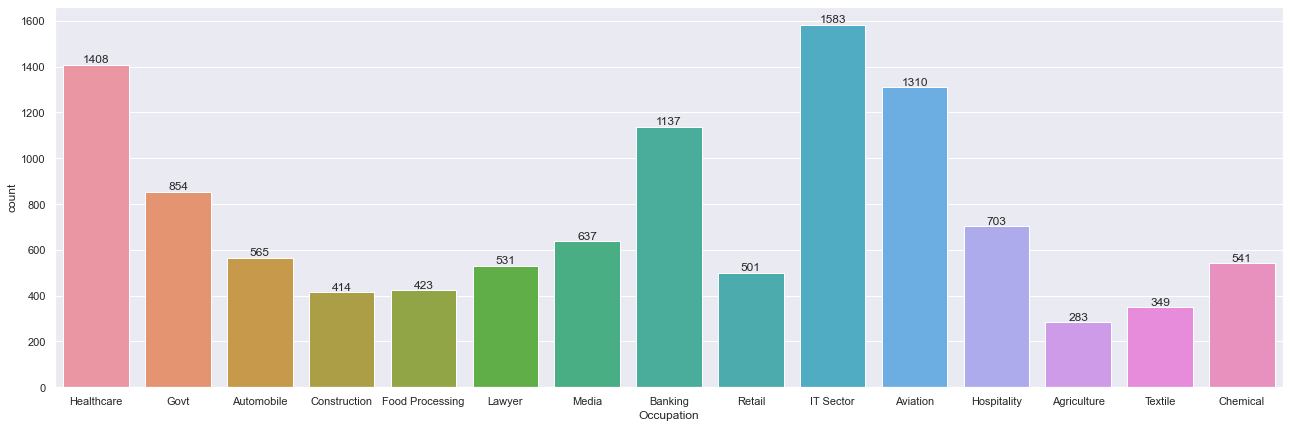

In [21]:
#Occupation
sns.set(rc={'figure.figsize':(22,7)})
a9=sns.countplot(data=df,x='Occupation')
for bars in a9.containers:
    a9.bar_label(bars)

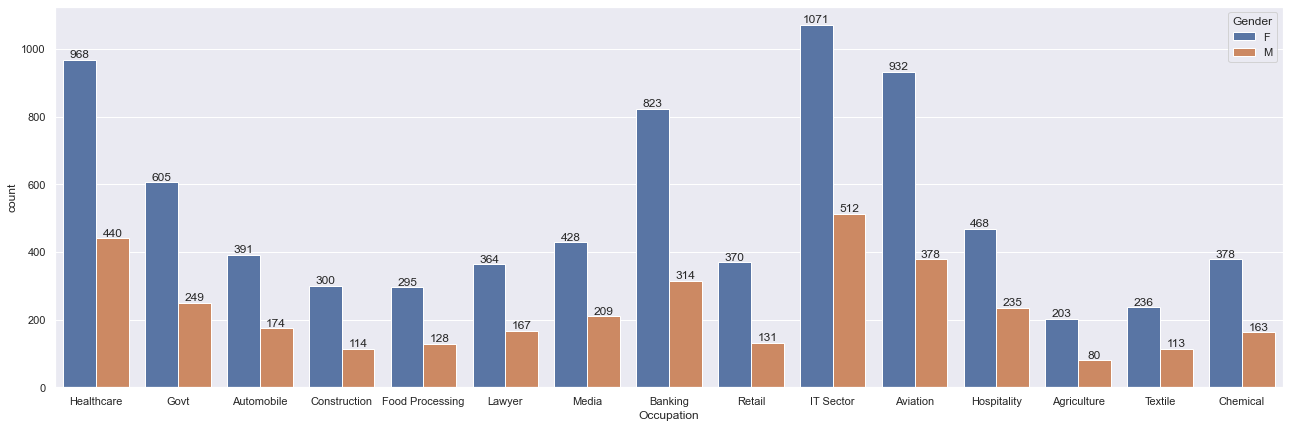

In [22]:
sns.set(rc={'figure.figsize':(22,7)})
a9=sns.countplot(data=df,x='Occupation',hue='Gender')
for bars in a9.containers:
    a9.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

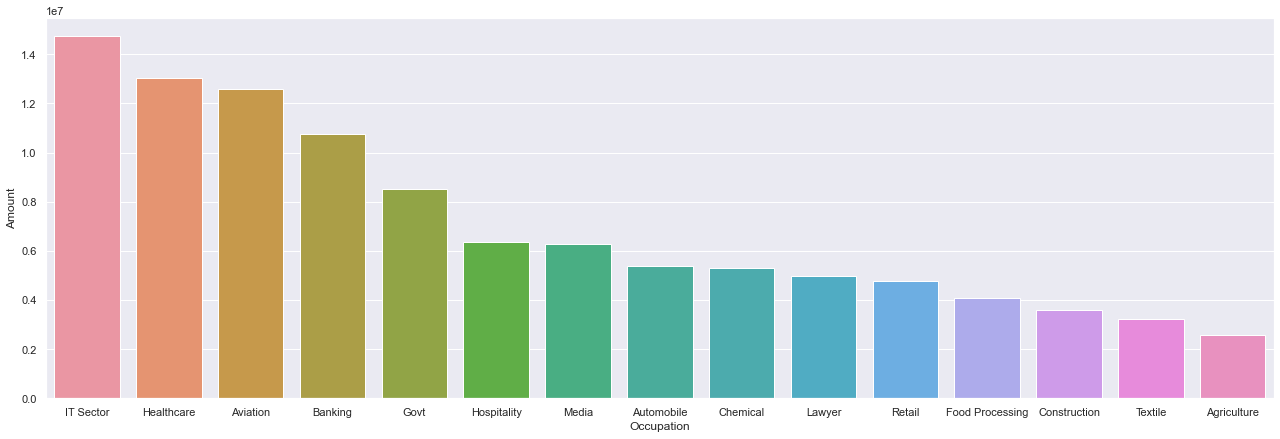

In [23]:
a10=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=a10)

# Here we can see IT sector has highest Purchasing Power

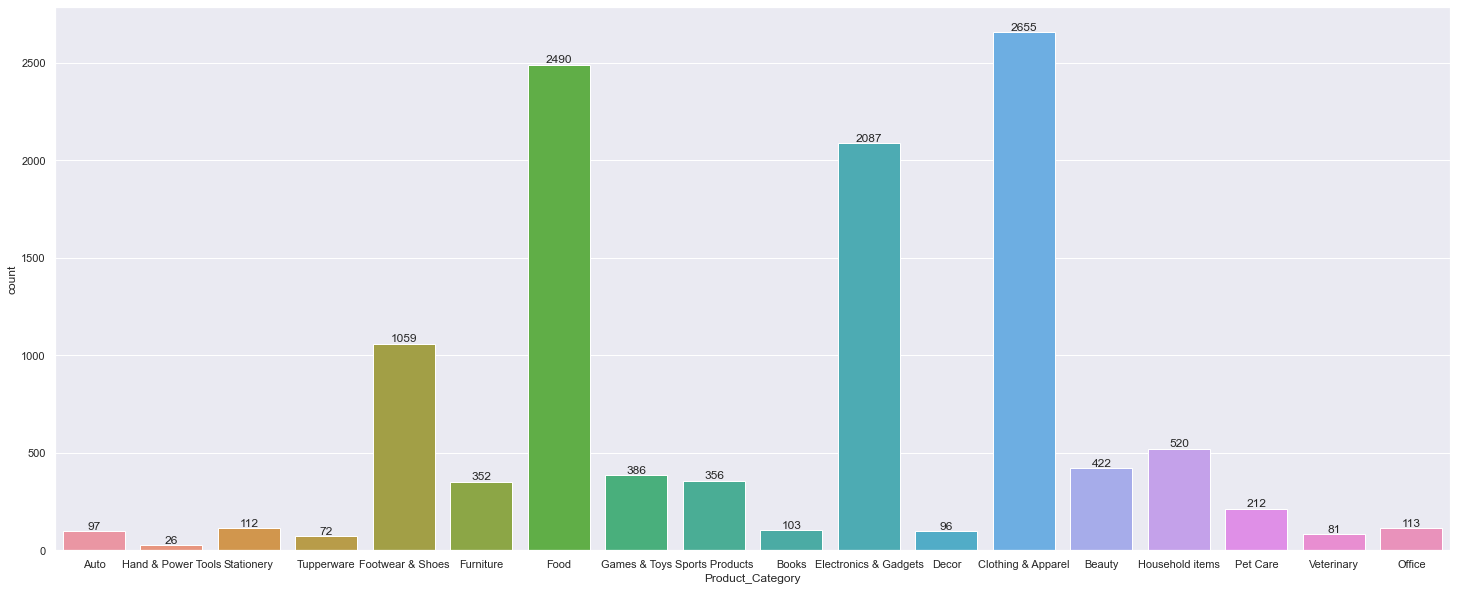

In [24]:
#Product Category
sns.set(rc={'figure.figsize':(25,10)})
a11=sns.countplot(x='Product_Category',data=df)
for bars in a11.containers:
    a11.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

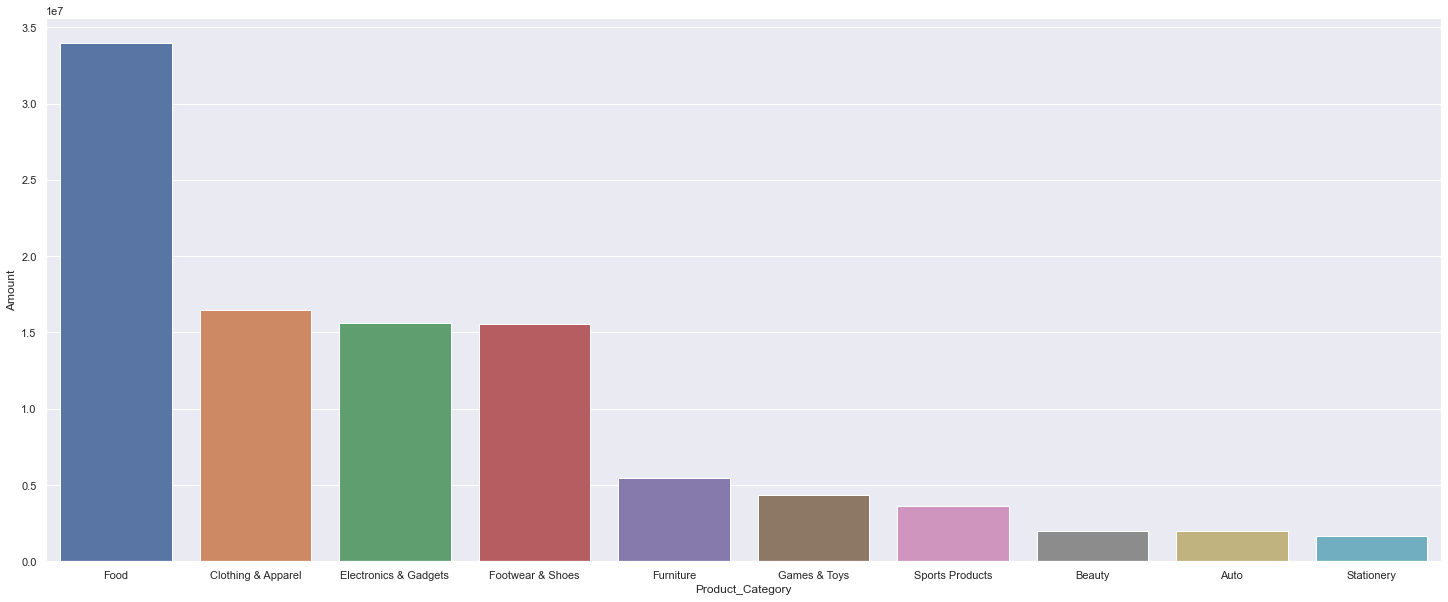

In [28]:
sns.set(rc={'figure.figsize':(25,10)})
a12=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=a12)

# Here we can see food category has the highest sales

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

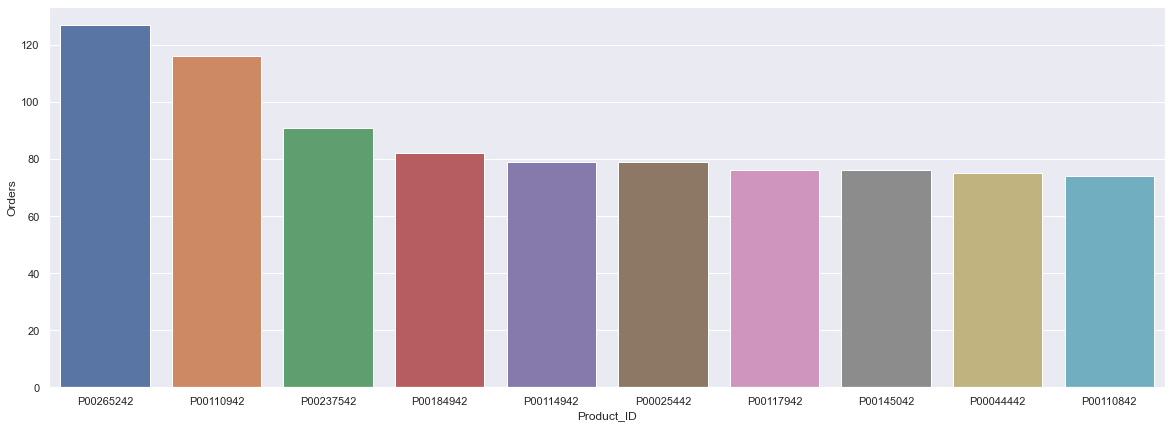

In [27]:
#Product ID
a13=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x='Product_ID',y='Orders',data=a13)

# Conclusion:
Unmarried woman of age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT,Healthcare and Aviation are most likely to buy products from Food,Clothing and Electronics category

# Thank you!
                                                                                          